# 第5章: 係り受け解析
日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [1]:
!wget -nc "https://nlp100.github.io/data/ai.ja.zip" -P data

--2021-06-27 14:46:18--  https://nlp100.github.io/data/ai.ja.zip
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
nlp100.github.io (nlp100.github.io)|185.199.110.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 17516 (17K) [application/zip]
`data/ai.ja.zip' に保存中

ai.ja.zip           100%[===================>]  17.11K  --.-KB/s 時間 0.001s     

2021-06-27 14:46:18 (14.2 MB/s) - `data/ai.ja.zip' へ保存完了 [17516/17516]



In [2]:
!unzip data/ai.ja.zip

Archive:  data/ai.ja.zip
  inflating: ai.ja.txt               
  inflating: readme.ai.ja.md         


In [4]:
!cabocha -f1 <data/ai.ja.txt >work/ai.ja.txt.parsed

In [5]:
# 中身をみてみる
!head work/ai.ja.txt.parsed

* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（


In [6]:
# 行数、単語数、バイト数の確認
!wc work/ai.ja.txt.parsed

 11744  32165 546121 work/ai.ja.txt.parsed


In [8]:
with open('data/ai.ja.txt') as fi, open('work/ai.ja.txt.splited', 'w') as output_fi:
    for line in fi:
        output_fi.write(line.replace('。', '。\n'))

In [9]:
!cabocha -f1 <work/ai.ja.txt.splited >work/ai.ja.txt.splited.parsed

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [10]:
from itertools import islice
from itertools import combinations
import re
from pprint import pprint
from collections import defaultdict

In [11]:
class Morph:
    def __init__(self, line):
        self.surface,tmp = line.split('\t')  # 表層系と形態素解析結果に分類
        morph = tmp.split(',')
        self.base = morph[6]  # 基本形
        self.pos = morph[0]  # 品詞
        self.pos1 = morph[1]  # 品詞細分類1
        
    def __repr__(self):  # リストの中身としてprintされる時も呼び出される
        return 'surface:{} base:{} pos:{} pos1:{}'.format(self.surface,self.base,self.pos,self.pos1)
        
        
# 解析結果を読み込む関数(一文のmorphオブジェクトのリストを返す)
def cabocha_reader(file):
    morphs_list = []  # 一文の解析結果を格納するリスト
    
    for line in file:
        line = line.rstrip('\n')  # 改行を取り除く
        if line.startswith('* '):  # 係り受け解析結果の行を飛ばす
            continue
        elif line == 'EOS':  # 文が終了した時点で解析結果のリストを返す
            if morphs_list:  # 空のリスト以外をyieldで返す
                yield morphs_list
                morphs_list.clear()  # リストの初期化
        else:  # 形態素解析結果について処理
            morphs_list.append(Morph(line))

            
with open('work/ai.ja.txt.splited.parsed') as file:              
    for morphs in islice(cabocha_reader(file),1,2):
        pprint(morphs)

[surface:人工 base:人工 pos:名詞 pos1:一般,
 surface:知能 base:知能 pos:名詞 pos1:一般,
 surface:（ base:（ pos:記号 pos1:括弧開,
 surface:じん base:じん pos:名詞 pos1:一般,
 surface:こうち base:こうち pos:名詞 pos1:一般,
 surface:のう base:のう pos:助詞 pos1:終助詞,
 surface:、 base:、 pos:記号 pos1:読点,
 surface:、 base:、 pos:記号 pos1:読点,
 surface:AI base:* pos:名詞 pos1:一般,
 surface:〈 base:〈 pos:記号 pos1:括弧開,
 surface:エーアイ base:* pos:名詞 pos1:固有名詞,
 surface:〉 base:〉 pos:記号 pos1:括弧閉,
 surface:） base:） pos:記号 pos1:括弧閉,
 surface:と base:と pos:助詞 pos1:格助詞,
 surface:は base:は pos:助詞 pos1:係助詞,
 surface:、 base:、 pos:記号 pos1:読点,
 surface:「 base:「 pos:記号 pos1:括弧開,
 surface:『 base:『 pos:記号 pos1:括弧開,
 surface:計算 base:計算 pos:名詞 pos1:サ変接続,
 surface:（ base:（ pos:記号 pos1:括弧開,
 surface:） base:） pos:記号 pos1:括弧閉,
 surface:』 base:』 pos:記号 pos1:括弧閉,
 surface:という base:という pos:助詞 pos1:格助詞,
 surface:概念 base:概念 pos:名詞 pos1:一般,
 surface:と base:と pos:助詞 pos1:並立助詞,
 surface:『 base:『 pos:記号 pos1:括弧開,
 surface:コンピュータ base:コンピュータ pos:名詞 pos1:一般,
 surface:（ base:（ pos:記号 pos

## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [12]:
class Chunck(Morph):  # Morphクラスの継承
    def __init__(self):
        self.morph = []
        self.dst = -1
        self.srcs = []
        
    def __repr__(self):  # 文節ごとに単語を結合して出力するようにする
        surface = ''.join(morph.surface for morph in self.morph)
        return 'morphs:{} dst:{} srcs:{}'.format(surface,self.dst,self.srcs)
        
def parseCaboCha(file):
    chunck_list = defaultdict(Chunck)  # Chunckオブジェクトで初期化する
    for line in file:
        line = line.rstrip('\n')
            
        # 文末のとき
        if line == 'EOS':
            sorted_chunck_list = sorted(chunck_list.items())  # デフォルトはkeyによる昇順ソート
            if sorted_chunck_list:
                yield sorted_chunck_list
                chunck_list.clear()
                
        # 係り受け解析情報の行
        elif line.startswith('* '):
            d = line.split(' ')  # スペースで区切る
            idx = int(d[1])  # 係り先文節インデックス番号
            dst = int(d[2].rstrip('D'))  # 係り元インデックス番号「
            chunck_list[idx].dst = dst  # 係り先文節インデックス番号の代入
            
            # 係り元が存在する場合
            if dst != -1:
                chunck_list[dst].srcs.append(idx)  # 係り元文節インデックス番号の追加
            
        # 形態素解析情報の行        
        else:
            chunck_list[idx].morph.append(Morph(line))  # 解析結果をmorphオブジェクトにして追加

# ８文目の文節の文字列と係り先を表示
with open('work/ai.ja.txt.splited.parsed') as file:
    for chuncks in islice(parseCaboCha(file),2,3):
        for chunck in chuncks:
            if chunck[1].dst != -1:
                print(chunck,chuncks[chunck[1].dst])
            else:
                print(chunck,"係り先無し")

(0, morphs:「言語の dst:2 srcs:[]) (2, morphs:推論、 dst:3 srcs:[0, 1])
(1, morphs:理解や dst:2 srcs:[]) (2, morphs:推論、 dst:3 srcs:[0, 1])
(2, morphs:推論、 dst:3 srcs:[0, 1]) (3, morphs:問題解決などの dst:4 srcs:[2])
(3, morphs:問題解決などの dst:4 srcs:[2]) (4, morphs:知的行動を dst:6 srcs:[3])
(4, morphs:知的行動を dst:6 srcs:[3]) (6, morphs:代わって dst:8 srcs:[4, 5])
(5, morphs:人間に dst:6 srcs:[]) (6, morphs:代わって dst:8 srcs:[4, 5])
(6, morphs:代わって dst:8 srcs:[4, 5]) (8, morphs:行わせる dst:9 srcs:[6, 7])
(7, morphs:コンピューターに dst:8 srcs:[]) (8, morphs:行わせる dst:9 srcs:[6, 7])
(8, morphs:行わせる dst:9 srcs:[6, 7]) (9, morphs:技術」、または、 dst:16 srcs:[8])
(9, morphs:技術」、または、 dst:16 srcs:[8]) (16, morphs:研究分野」とも dst:17 srcs:[9, 15])
(10, morphs:「計算機 dst:11 srcs:[]) (11, morphs:（コンピュータ）による dst:13 srcs:[10])
(11, morphs:（コンピュータ）による dst:13 srcs:[10]) (13, morphs:情報処理システムの dst:15 srcs:[11, 12])
(12, morphs:知的な dst:13 srcs:[]) (13, morphs:情報処理システムの dst:15 srcs:[11, 12])
(13, morphs:情報処理システムの dst:15 srcs:[11, 12]) (15, morphs:実現に関する dst:16 srcs

## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [13]:
class Chunck(Chunck):  # Chunckクラスの継承
    def get_surface(self):  # 記号を取り除いて文節の表層形を抽出する関数
        return ''.join(morph.surface for morph in self.morph if morph.pos != '記号')        

with open('work/ai.ja.txt.splited.parsed') as file:
    for chuncks in islice(parseCaboCha(file),0,2):  # Q41の関数を一文ずつ実行
        for chunck in chuncks:
            if chunck[1].dst != -1:  # 係り先がない文節をはじく
                word1 = chunck[1].get_surface()
                word2 = chuncks[chunck[1].dst][1].get_surface()
                print(word1,word2,sep='\t')

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語


## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [14]:
class Chunck(Chunck):  # Chunckクラスの継承
    def is_pos(self,pos):  # ある品詞が文節に含まれているかどうかを判定する関数
        is_pos = False
        for morph in self.morph:
            if morph.pos == pos:
                is_pos = True
        return is_pos
    
with open('work/ai.ja.txt.splited.parsed') as file:
    for chuncks in islice(parseCaboCha(file),0,3): 
        for chunck in chuncks:
            if chunck[1].dst != -1:  # 係り先がない文節をはじく
                words1 = chunck[1].get_surface()  # 係り元文節
                words2 = chuncks[chunck[1].dst][1].get_surface()  # 係り先文節
                if chunck[1].is_pos('名詞') and chuncks[chunck[1].dst][1].is_pos('動詞'):
                    print(words1,words2,sep='\t')

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

In [15]:
from subprocess import run, PIPE
from graphviz import Digraph
import pydot

In [16]:
# 任意のテキストをcabochaで解析する
text = "人工知能（じんこうちのう、、AI〈エーアイ〉）とは、「『計算（）』という概念と『コンピュータ（）』という道具を用いて『知能』を研究する計算機科学（）の一分野」を指す語。「言語の理解や推論、問題解決などの知的行動を人間に代わってコンピューターに行わせる技術」、または、「計算機（コンピュータ）による知的な情報処理システムの設計や実現に関する研究分野」ともされる。"

command = f"echo {text} | cabocha -f1"  # textを係り受け解析
process = run(command, shell=True, stdout=PIPE, stderr=PIPE)  # commandを実行
lines = process.stdout.decode('UTF-8').splitlines()  # 標準出力を1行ごとのリストとする

In [17]:
for chuncks in parseCaboCha(lines):  # 引数の部分は標準出力をデコードし、改行で分割したリスト
    edges = []
    for i,chunck in enumerate(chuncks):
        if chunck[1].dst != -1:  # 係り先がない文節をはじく
            word1 = chunck[1].get_surface()  # 係り元文節
            word2 = chuncks[chunck[1].dst][1].get_surface()  # 係り先文節
            edges.append(((i,word1),(chunck[1].dst, word2)))

# グラフの可視化
g=pydot.graph_from_edges(edges, directed=True)
g.write_png('work/q44.dot.png')

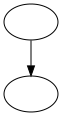

In [18]:
G = Digraph()
G.node('1',label='あ')
G.node('2',label='か')
G.edge('1','2')
G

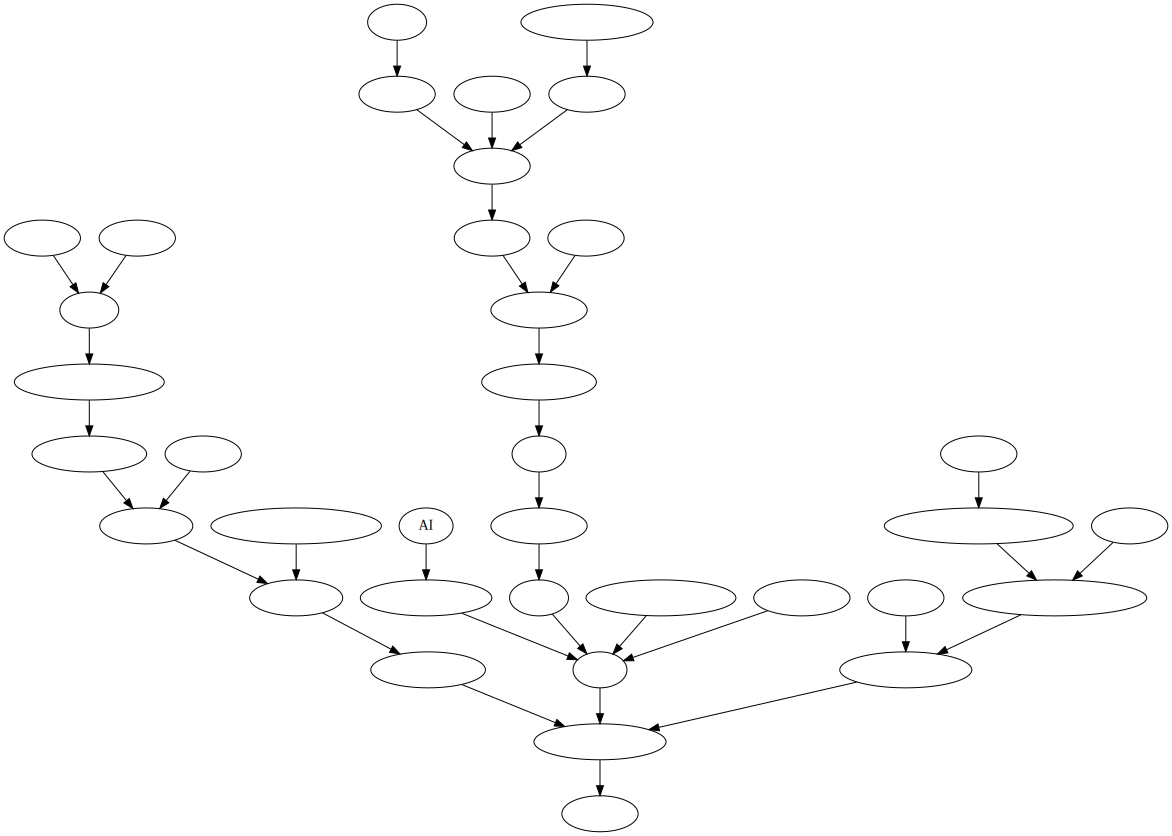

In [19]:
# Graphvizを使用
G = Digraph()
for src,dst in edges:
    G.node(str(src[0]),label=src[1])
    G.node(str(dst[0]),label=dst[1])
    G.edge(str(src[0]),str(dst[0]))
G

## 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

    作り出す	で は を

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語と格パターンの組み合わせ
- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [20]:
class Chunck(Chunck):  # Chunckクラスの継承
    def lfind(self,pos):  # posで指定された品詞の単語を返す関数(一番左のものを返す)
        for morph in self.morph:
            if morph.pos == pos:
                return morph
            
    def rfind(self,pos):  # posで指定された品詞の単語を返す関数(一番右のものを返す)
        flame = ''
        for morph in self.morph:
            if morph.pos == pos:
                flame = morph.surface
        return flame
    
# chunckオブジェクトのリストを受け取り、動詞を含む文節に対して述語と格を出力する
with open('work/ai.ja.txt.splited.parsed') as read_file, open('work/case_flame.txt','w') as output_file:
    for chuncks in parseCaboCha(read_file):
        for chunck in chuncks:  # 各chunckに対して処理
            if chunck[1].is_pos('動詞'):  # 動詞を含む文節のみ処理
                verb = chunck[1].lfind('動詞')  # 最左の動詞を格納
                
                # 動詞にかかっている文節のなかで助詞が含まれている場合casesリストに追加
                # 一つの文節に助詞が複数存在する場合は最右の助詞を取得
                cases = (chuncks[src][1].rfind('助詞') for src in chunck[1].srcs)
                # 空文字を除去
                cases = filter(lambda x: x != '', cases)
                # 格が存在していた時のみファイルに出力
                if cases:
                    print(verb.base,' '.join(sorted(cases)),sep='\t',file=output_file)

In [21]:
# コーパス中で頻出する述語と格パターンの組み合わせ
!sort -k 1 work/case_flame.txt | uniq -c | sort -nr | head

     53 する	を
     19 する	と
     18 する	が
     16 する	に
     12 する	は を
     11 よる	に
     10 する	に を
      9 する	で を
      8 する	と は
      8 する	が に


In [22]:
# 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）
# awkコマンドで条件に文字列を使うときは""で囲む
!cat work/case_flame.txt | awk '$1 == "行う"' | uniq -c | sort -r | head

      4 行う	を
      1 行う	から
      1 行う	に により を
      1 行う	に まで を
      1 行う	は を をめぐって
      1 行う	で は まで を
      1 行う	が て に は
      1 行う	は は は
      1 行う	に を を
      1 行う	で に を


In [23]:
!cat work/case_flame.txt | awk '$1 == "なる"' | uniq -c | sort -r | head

      2 なる	に は
      1 なる	から が て と は ば
      1 なる	から で と
      1 なる	が にとって は
      1 なる	て として に は
      1 なる	と など は
      1 なる	が で と に は は
      1 なる	で に は
      1 なる	が に は
      1 なる	が と に


In [24]:
!cat work/case_flame.txt | awk '$1 == "与える"' | uniq -c | sort -r | head

      2 与える	が に
      1 与える	に は を


## 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである

    作り出す	で は を	会議で ジョンマッカーシーは 用語を

In [25]:
class Chunck(Chunck):  # Chunckクラスの継承
    def rfind_and_getsurface(self,pos):  # posで指定された最右の品詞の単語とその文節の表層形を返す関数
        flame,surface = '',''
        for morph in self.morph:
            if morph.pos != '記号':
                surface += morph.surface
            if morph.pos == pos:
                flame = morph.surface
        return flame,surface

    
# chunckオブジェクトのリストを受け取り、動詞を含む文節に対して述語と格を出力する
with open('work/ai.ja.txt.splited.parsed') as read_file, open('work/case_flame_q46.txt','w') as output_file:
    for chuncks in parseCaboCha(read_file):
        for chunck in chuncks:  # 各chunckに対して処理
            if chunck[1].is_pos('動詞'):  # 動詞を含む文節のみ処理
                verb = chunck[1].lfind('動詞')  # 最左の動詞を格納
                
                # 動詞にかかっている文節のなかで助詞が含まれている場合casesリストにその助詞と文節を追加
                # 一つの文節に助詞が複数存在する場合は最右の助詞を取得
                cases = (chuncks[src][1].rfind_and_getsurface('助詞') for src in chunck[1].srcs)
                # 空文字を除去
                cases = filter(lambda x: x[0] != '', cases)
                # 50音順にソート
                cases = sorted(cases,key=lambda x:x[0])
                # 格が存在していた時のみファイルに出力
                if cases:
                    cases,case_surface = zip(*cases)
                    print(verb.base,' '.join(cases),' '.join(case_surface), sep='\t',file=output_file)

In [26]:
!head work/case_flame_q46.txt

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに
する	も	研究分野とも
述べる	で に は	解説で 次のように 佐藤理史は
する	で を	コンピュータ上で 知的能力を
する	を	推論判断を
する	を	画像データを


## 47. 機能動詞構文のマイニング

- コーパス中で頻出する述語（サ変接続名詞+を+動詞）
- コーパス中で頻出する述語と助詞パターン

動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

    学習を行う	に を	元に 経験を

-  cabochaが改行でEOSを判定しているため、改行なしで複数文が続いている箇所に関しては非常に長い文と捉えられてしまう
-  100本ノックの出力例をみる限り、「。」で１文とみなしてcabochaで解析しているようにみえるため、以下の処理を行って正確な１文区切りになおす
    - ai.ja.txtの「。」を「。\n」に置換する
    - 置換したテキストファイルを用いてcabochaで解析をかける
    - (これを行うともともと改行で終了していた箇所が「。\n\n」となり、解析をかけるとEOS\nEOSのように空行がたくさん出てきてしまうが、これは自分のコードで空行を弾く処理を行っているため問題ない)

In [27]:
class Chunck(Chunck):
    # 「品詞細分類がpos1の単語＋表層形がsurfaceである単語」で構成される文節の「〜」の部分を返す関数
    def get_pos1_and_get_surface(self,pos1,surface):
        ans = ''
        for i in range(len(self.morph) - 1):
            # 「品詞細分類がpos1の単語＋表層形がsurfaceである単語」となっている箇所があるか判定
            if self.morph[i].pos1 == pos1 and self.morph[i+1].surface == surface:
                ans = self.morph[i].surface + self.morph[i+1].surface
        return ans

    
with open('work/ai.ja.txt.splited.parsed') as read_file, open('work/case_flame_q47.txt','w') as output_file:
    for chuncks in parseCaboCha(read_file):
        for chunck in chuncks:  # 各chunckに対して処理
            # 動詞を含む文節について処理
            if chunck[1].is_pos('動詞'):
                verb = chunck[1].lfind('動詞')  # 最左の動詞を格納
                cases = []
                # 動詞にかかっている文節について処理
                for src in chunck[1].srcs:
                    sahen_wo = chuncks[src][1].get_pos1_and_get_surface('サ変接続','を')
                    cases.append(chuncks[src][1].rfind_and_getsurface('助詞'))
                # 「空文字」・「サ変接続＋を」を除去
                cases = filter(lambda x: x[0] != '' and sahen_wo not in x[1], cases)
                # 50音順にソート
                cases = sorted(cases,key=lambda x:x[0])
                # 格が存在していた時のみファイルに出力
                if sahen_wo and cases:
                    cases,case_surface = zip(*cases)
                    print(sahen_wo + verb.base,' '.join(cases),' '.join(case_surface), sep='\t',file=output_file)

In [28]:
!head work/case_flame_q47.txt

注目を集める	が	サポートベクターマシンが
学習を行う	に を	元に 経験を
進化を見せる	て において は	加えて 生成技術において 敵対的生成ネットワークは
開発を行う	は	エイダ・ラブレスは
処理を行う	に により	Webに ティム・バーナーズリーにより
意味をする	に	データに
処理を行う	て に	付加して コンピュータに
研究を進める	て	費やして
運転をする	に	元に
特許をする	が に	日本が 2018年までに


## 48. 名詞から根へのパスの抽出

文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

- 各文節は（表層形の）形態素列で表現する
- パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

    ジョンマッカーシーは -> 作り出した
    AIに関する -> 最初の -> 会議で -> 作り出した
    最初の -> 会議で -> 作り出した
    会議で -> 作り出した
    人工知能という -> 用語を -> 作り出した
    用語を -> 作り出した

In [29]:
with open('work/ai.ja.txt.splited.parsed') as read_file:
    for chuncks in islice(parseCaboCha(read_file),33,34):
        for chunck in chuncks:  # 各chunckに対して処理
            path_list = []
            if chunck[1].is_pos('名詞'):
                next_word = chunck[1].dst  # 係り先の番号をnext_wordに
                path_list.append(chunck[1].get_surface())  # パスに文節を追加
                # 文末の文節にたどり着くまで係り先をたどっていく
                while next_word != -1:
                    path_list.append(chuncks[next_word][1].get_surface())  # 現在の位置の単語をパスに追加
                    next_word = chuncks[next_word][1].dst  # 現在の位置を更新
                print(' -> '.join(path_list))  # ' -> '区切りの文字列に直して出力

ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した


## 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
- 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
- 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

    Xは | Yに関する -> 最初の -> 会議で | 作り出した
    Xは | Yの -> 会議で | 作り出した
    Xは | Yで | 作り出した
    Xは | Yという -> 用語を | 作り出した
    Xは | Yを | 作り出した
    Xに関する -> Yの
    Xに関する -> 最初の -> Yで
    Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
    Xに関する -> 最初の -> 会議で | Yを | 作り出した
    Xの -> Yで
    Xの -> 会議で | Yという -> 用語を | 作り出した
    Xの -> 会議で | Yを | 作り出した
    Xで | Yという -> 用語を | 作り出した
    Xで | Yを | 作り出した
    Xという -> Yを

In [31]:
class Chunck(Chunck):
    # 名詞をX,Yにマスクする関数
    def mask_noun(self,mask):  # maskは"X"か"Y"が入る
        ans = ''
        for morph in self.morph:
            if morph.pos == '名詞':
                # 名詞が連続した時にXXやYYとならないように、直前にXやYを追加している場合は処理しない
                if not ans or ans[-1] != mask:  
                    ans += mask
            elif morph.pos != '記号':
                ans += morph.surface
        return ans

# n:文節番号　chuncks:文節情報 mask:XかY
def change_xy(n,chuncks, mask):
    x = ''
    for word in chuncks[n][1].morph:
        if word.pos == '名詞':x += mask
        else:x += word.surface
    return x
    
    
with open('work/ai.ja.txt.splited.parsed') as read_file:
    for chuncks in islice(parseCaboCha(read_file),33,34):
        in_noun = {chunck[0] for chunck in chuncks if chunck[1].is_pos('名詞')}
        
    for a,b in combinations(in_noun,2):  # 文中で名詞が含まれる文節２つを選ぶ組み合わせごとに処理
        butu = False  # aとbがぶつかるかどうか
        b_index = -1  # 衝突先の文節番号を格納
        x_move = set()  # 文節aの経路
        
        # aからbにぶつからないか
        next_word = chuncks[a][1].dst
        while next_word != -1:  # 文節aの経路を辿り文節bにぶつかるかどうかを探す
            if next_word == b:
                butu = True
                break
            x_move.add(next_word)  # 経路を格納
            next_word = chuncks[next_word][1].dst
        
        # aとbが文末以外で共通の文節にぶつかっているか
        if not butu:
            next_word = chuncks[b][1].dst
            while next_word != -1:  # 文節bの経路を辿り文節aの経路にぶつかるかどうかを探す
                if next_word in x_move:
                    b_index = chuncks[next_word][0]
                    break
                else:
                    next_word = chuncks[next_word][1].dst
    
        # 出力
        # 文節aが文節bにぶつかるパターン
        if b_index == -1:
            path_list,next_word = [chuncks[a][1].mask_noun('X')],chuncks[a][1].dst
            while next_word != chuncks[b][1].dst:
                path_list.append(chuncks[next_word][1].get_surface())
                next_word = chuncks[next_word][1].dst
            path_list[-1] = change_xy(b,chuncks,'Y')  # 文節bのマスク処理
            print(' -> '.join(path_list))  # ' -> 'で連結して表示
        
    
        # 共通の文節にぶつかるパターン
        else:
            x = ''
            # 文節a,文節bそれぞについて処理
            for i,j in zip((a,b),('X','Y')):
                # 文節のマスク処理
                path_list,next_word = [chuncks[i][1].mask_noun(j)],chuncks[i][1].dst
                while next_word != b_index:
                    path_list.append(chuncks[next_word][1].get_surface())
                    next_word = chuncks[next_word][1].dst
                x += ' -> '.join(path_list) + ' | '
                
            # 連結して出力
            print(x + chuncks[b_index][1].get_surface())

Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
